In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
!ls ../homework/

AMZN.csv	city_weather.csv    movie_metadata.csv	top5.csv
apply_demo.csv	demo_duplicate.csv  Pokemon.csv		train.csv
BABA.csv	iris.csv	    sales-funnel.xlsx	usa_flights.csv


In [3]:
link = 'https://projects.fivethirtyeight.com/flights/'

In [4]:
df = pd.read_csv('../homework/usa_flights.csv')

In [5]:
df.shape

(201664, 14)

In [6]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0


In [7]:
df.tail()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
201659,10/01/2015 0:00,NK,188,OAK,LAS,-16.0,0,407,NaN,NaN,NaN,NaN,NaN,77.0
201660,11/01/2015 0:00,NK,188,OAK,LAS,-4.0,0,407,NaN,NaN,NaN,NaN,NaN,87.0
201661,12/01/2015 0:00,NK,188,OAK,LAS,-7.0,0,407,NaN,NaN,NaN,NaN,NaN,82.0
201662,13/01/2015 0:00,NK,188,OAK,LAS,23.0,0,407,3.0,0.0,0.0,20.0,0.0,103.0
201663,14/01/2015 0:00,NK,188,OAK,LAS,-7.0,0,407,NaN,NaN,NaN,NaN,NaN,82.0


# 1. 获取延误时间最长top10的航空公司

In [8]:
df.sort_values('arr_delay', ascending=False)[:10][['flight_date','unique_carrier','flight_num','origin','dest','arr_delay']]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay
11073,11/01/2015 0:00,AA,1595,AUS,DFW,1444.0
10214,13/01/2015 0:00,AA,1487,OMA,DFW,1392.0
12430,03/01/2015 0:00,AA,1677,MEM,DFW,1384.0
8443,04/01/2015 0:00,AA,1279,OMA,DFW,1237.0
10328,05/01/2015 0:00,AA,1495,EGE,DFW,1187.0
36570,04/01/2015 0:00,DL,1435,MIA,MSP,1174.0
36495,04/01/2015 0:00,DL,1367,ROC,ATL,1138.0
59072,14/01/2015 0:00,DL,1687,SAN,MSP,1084.0
32173,05/01/2015 0:00,AA,970,LAS,LAX,1042.0
56488,12/01/2015 0:00,DL,2117,ATL,COS,1016.0


# 2.计算延误和没有延误所占比例

In [9]:
df['cancelled'].value_counts()

0    196873
1      4791
Name: cancelled, dtype: int64

In [10]:
df['delayed'] = df['arr_delay'].apply(lambda x: x > 0)

In [11]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0,False
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0,False
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0,False
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0,False
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0,True


In [12]:
delay_data = df['delayed'].value_counts()

In [13]:
delay_data[1]/(delay_data[0] + delay_data[1])

0.48906597112027927

# 3.每一个航空公司延误的情况

In [14]:
delay_group = df.groupby(['unique_carrier','delayed'])

In [17]:
delay_group.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [16]:
df_delay = delay_group.size().unstack()

In [35]:
df_delay

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [18]:
import matplotlib.pyplot as plt

In [19]:
df_delay.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

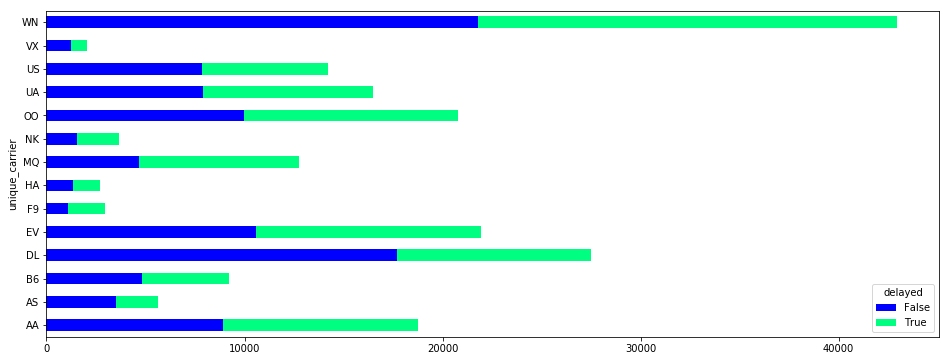

In [20]:
plt.show()

# 4. 透视表功能

In [42]:
flights_by_carrier = df.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flights_by_carrier.head()

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
02/01/2015 0:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
03/01/2015 0:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
04/01/2015 0:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
05/01/2015 0:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
06/01/2015 0:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
